In [333]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [335]:
df = pd.read_csv('digital_wallet_transactions.csv')

In [337]:
df

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban


In [339]:
df = df.drop(columns=['idx', 'user_id', 'transaction_id'])

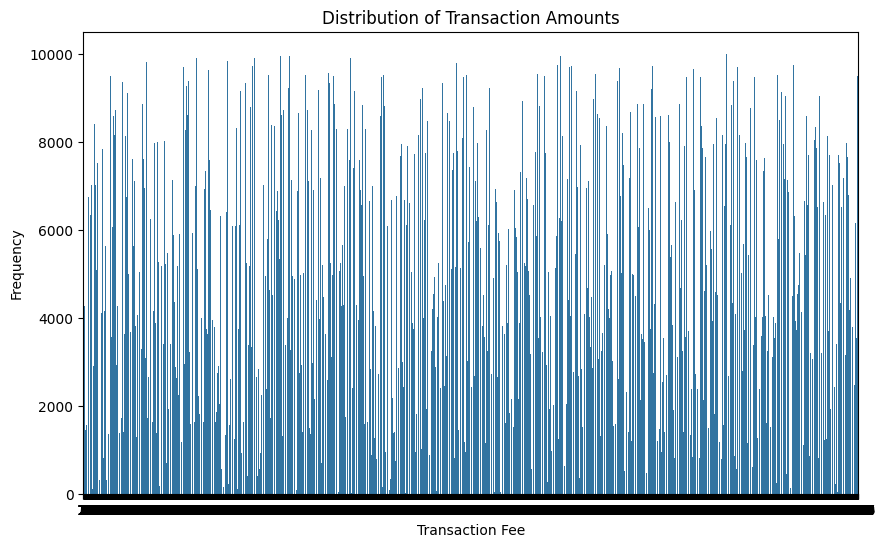

In [341]:
plt.figure(figsize=(10, 6))
sns.barplot(df['product_amount'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Fee')
plt.ylabel('Frequency')
plt.show()

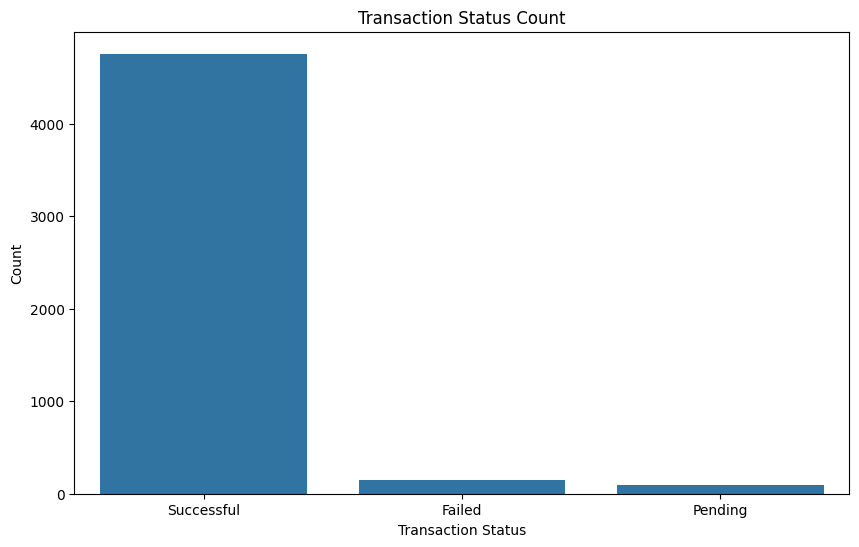

In [342]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_status')
plt.title('Transaction Status Count')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
plt.show()

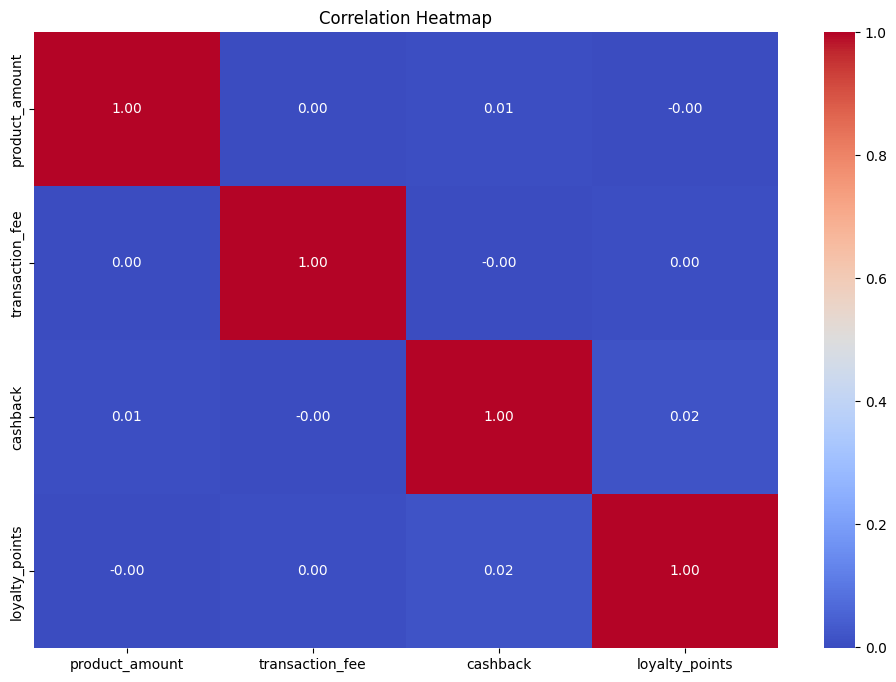

In [343]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [2]:
cols = ['product_category','transaction_status','payment_method','device_type','location']
for col in cols:
    sns.countplot(y=col,data=df)
    plt.show()

NameError: name 'sns' is not defined

In [344]:
print(df['device_type'].value_counts())
print(df['transaction_status'].value_counts())
print(df['payment_method'].value_counts())
print(df['location'].value_counts())

device_type
Android    2995
iOS        1526
Web         479
Name: count, dtype: int64
transaction_status
Successful    4755
Failed         146
Pending         99
Name: count, dtype: int64
payment_method
Bank Transfer     1045
Debit Card        1022
UPI                999
Credit Card        992
Wallet Balance     942
Name: count, dtype: int64
location
Urban       3485
Suburban    1017
Rural        498
Name: count, dtype: int64


In [345]:
device_type_mapping = {
    'Android': 1,
    'iOS': 2,
    'Web': 3
}

transaction_status_mapping = {
    'Successful': 1,
    'Failed': 2,        
    'Pending': 3        
}

payment_method_mapping = {
    'Bank Transfer': 1,
    'Debit Card': 2,
    'UPI': 3,   
    'Credit Card': 4, 
    'Wallet Balance': 5
}

location_mapping = {
    'Urban': 1,
    'Suburban': 2,
    'Rural': 3
    
}



df['device_type'] = df['device_type'].map(device_type_mapping).fillna(-1).astype(int)
df['transaction_status'] = df['transaction_status'].map(transaction_status_mapping).fillna(-1).astype(int)
df['payment_method'] = df['payment_method'].map(payment_method_mapping).fillna(-1).astype(int)
df['location'] = df['location'].map(location_mapping).fillna(-1).astype(int)

# Since the Device type has 3 devices types I want to label them as numerical values for future use cases for machine learning


In [346]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [347]:
df

,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,2,1,MERCH_0083,2,1
1,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,3,1,MERCH_0163,2,1
2,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,3,1,MERCH_0320,2,1
3,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,2,1,MERCH_0194,1,1
4,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,2,1,MERCH_0504,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-08-17 19:39:00,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,3,1,MERCH_0203,1,3
4996,2024-08-17 19:42:00,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,4,1,MERCH_0480,2,1
4997,2024-08-17 23:24:00,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,1,1,MERCH_0411,1,2
4998,2024-08-18 00:28:00,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,3,1,MERCH_0524,2,2


In [269]:
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['day_of_week'] = df['transaction_date'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['transaction_date'].dt.hour

In [271]:
df = df.drop(columns=['transaction_date'])

In [277]:
df

,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,year,month,day,day_of_week,hour
0,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,2,1,MERCH_0083,2,1,2023,8,19,5,3
1,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,3,1,MERCH_0163,2,1,2023,8,19,5,4
2,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,3,1,MERCH_0320,2,1,2023,8,19,5,5
3,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,2,1,MERCH_0194,1,1,2023,8,19,5,6
4,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,2,1,MERCH_0504,1,1,2023,8,19,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,3,1,MERCH_0203,1,3,2024,8,17,5,19
4996,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,4,1,MERCH_0480,2,1,2024,8,17,5,19
4997,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,1,1,MERCH_0411,1,2,2024,8,17,5,23
4998,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,3,1,MERCH_0524,2,2,2024,8,18,6,0


In [310]:
features = ['transaction_status', 'product_amount', 'loyalty_points','year','month','day','day_of_week','hour']
X = df[features]
y = df['transaction_fee']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
rf_model = RandomForestRegressor(random_state=42)

In [316]:
# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Score from Grid Search:", -grid_search.best_score_)

# Cross-Validation Scores
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", -cv_scores)
print("Average Cross-Validation Score:", -cv_scores.mean())

Best Parameters from Grid Search: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score from Grid Search: 211.90957617947544
Cross-Validation Scores: [224.10761184 219.19828318 224.25537599 225.09834341 221.36518301]
Average Cross-Validation Score: 222.80495948480603


In [317]:
best_rf_model = grid_search.best_estimator_

In [318]:
# Cross-Validation Scores
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", -cv_scores)
print("Average Cross-Validation Score:", -cv_scores.mean())

# Fit the model with the best parameters
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

Cross-Validation Scores: [213.25075339 210.2884277  216.5385051  215.14640226 211.05851179]
Average Cross-Validation Score: 213.2565200493607


In [319]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 12.94602837684699
Mean Squared Error (MSE): 220.40756761291036
Root Mean Squared Error (RMSE): 14.846129718310774
R-squared: -0.023286487374662768


In [320]:
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R-squared: {r2_lr}")

# Cross-validation scores for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores for Linear Regression:", -cv_scores_lr)
print("Average Cross-Validation Score for Linear Regression:", -cv_scores_lr.mean())

Linear Regression Performance:
Mean Absolute Error (MAE): 12.862728286325051
Mean Squared Error (MSE): 215.8612539671144
Root Mean Squared Error (RMSE): 14.692217462558686
R-squared: -0.0021793113756951588
Cross-Validation Scores for Linear Regression: [209.57077129 206.68556092 216.66675379 214.52042256 211.84378291]
Average Cross-Validation Score for Linear Regression: 211.85745829390717


In [502]:
df_prophet = df[['transaction_date', 'product_amount','transaction_fee']].rename(columns={'transaction_date': 'ds', 'product_amount': 'y'})

In [518]:
df_prophet

,ds,y,transaction_fee
0,2023-08-19 03:32:00,1525.39,36.69
1,2023-08-19 04:37:00,1495.40,28.19
2,2023-08-19 05:52:00,1267.71,11.36
3,2023-08-19 06:35:00,9202.63,6.41
4,2023-08-19 06:36:00,3100.58,41.15
...,...,...,...
4995,2024-08-17 19:39:00,9496.45,37.25
4996,2024-08-17 19:42:00,710.40,14.01
4997,2024-08-17 23:24:00,2750.06,48.69
4998,2024-08-18 00:28:00,9976.19,21.96


In [506]:
from prophet import Prophet
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, seasonality_mode='multiplicative')
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.add_regressor('transaction_fee')


# Fit the model
model.fit(df_prophet)

04:45:55 - cmdstanpy - INFO - Chain [1] start processing
04:45:55 - cmdstanpy - INFO - Chain [1] done processing


In [524]:
future = model.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
5338,2025-08-14 01:15:00
5339,2025-08-15 01:15:00
5340,2025-08-16 01:15:00
5341,2025-08-17 01:15:00
5342,2025-08-18 01:15:00


In [536]:
future['transaction_fee'] = df_prophet['transaction_fee']
future['transaction_fee'] = future['transaction_fee'].fillna(0)

In [538]:
future

,ds,transaction_fee
0,2023-08-19 03:32:00,36.69
1,2023-08-19 04:37:00,28.19
2,2023-08-19 05:52:00,11.36
3,2023-08-19 06:35:00,6.41
4,2023-08-19 06:36:00,41.15
...,...,...
5338,2025-08-14 01:15:00,0.00
5339,2025-08-15 01:15:00,0.00
5340,2025-08-16 01:15:00,0.00
5341,2025-08-17 01:15:00,0.00


In [540]:
forecast = model.predict(future)

In [542]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-08-19 03:32:00,4236.849221,670.408321,8050.424049
1,2023-08-19 04:37:00,4356.157497,686.241203,8147.316512
2,2023-08-19 05:52:00,4474.758936,896.625701,8026.346288
3,2023-08-19 06:35:00,4487.290041,919.303381,8004.529088
4,2023-08-19 06:36:00,4495.233452,732.981250,8188.293564
...,...,...,...,...
5338,2025-08-14 01:15:00,6213.977151,2704.027809,9957.497099
5339,2025-08-15 01:15:00,6288.180355,2850.625670,9833.493842
5340,2025-08-16 01:15:00,6870.993111,3196.680954,10553.824064
5341,2025-08-17 01:15:00,7196.645896,3408.359054,10503.274343


C:\Users\Windows10\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Windows10\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


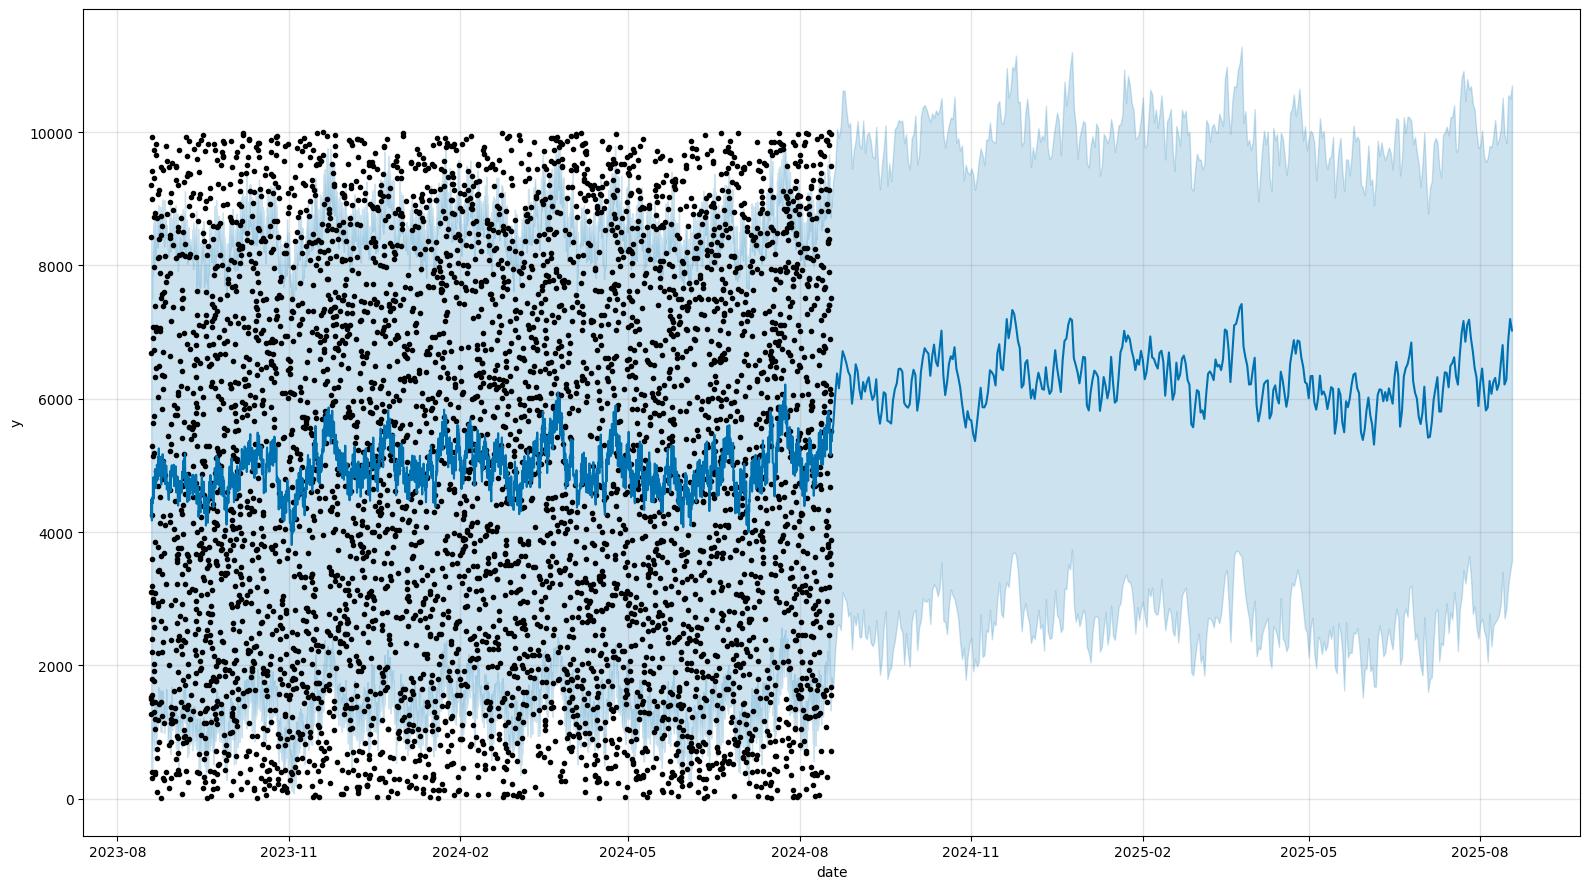

In [548]:
fig = model.plot(forecast, uncertainty=True, figsize= (16,9), xlabel='date')
plt.show()

C:\Users\Windows10\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Windows10\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Windows10\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old 

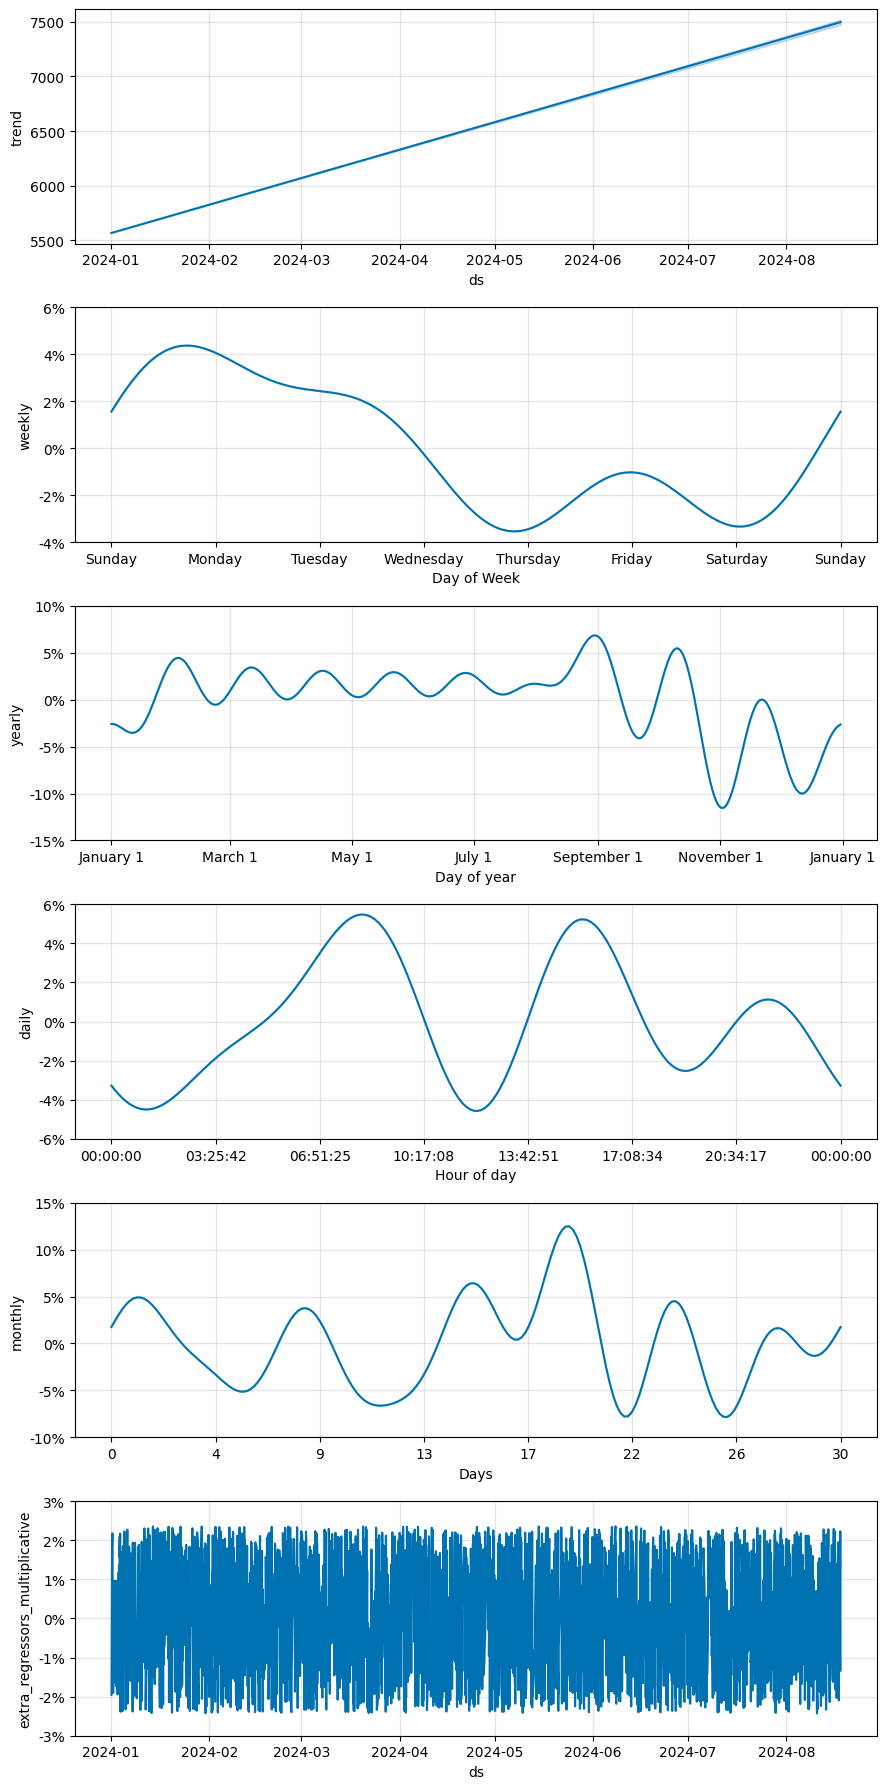

In [558]:
fig = model.plot_components(forecast)